In [1]:
#pandas, numpy, and random
import pandas as pd
import numpy as np
import random as ran

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#describe the data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#check na
train.isnull().any(axis=0)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Will need to clean the Age and Embarked column. Cabin will probably deleted

In [5]:
null_age = train['Age'].isnull()
is_invalid = train['Age'] < 0
train[null_age].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [6]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Brown, Miss. Amelia ""Mildred""",male,347082,B96 B98,S
freq,1,577,7,4,644


**ANALYZING DATA**

In [7]:
#Correlating from Passenger Class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**First class passenger have higher chance of survival than second and third class**

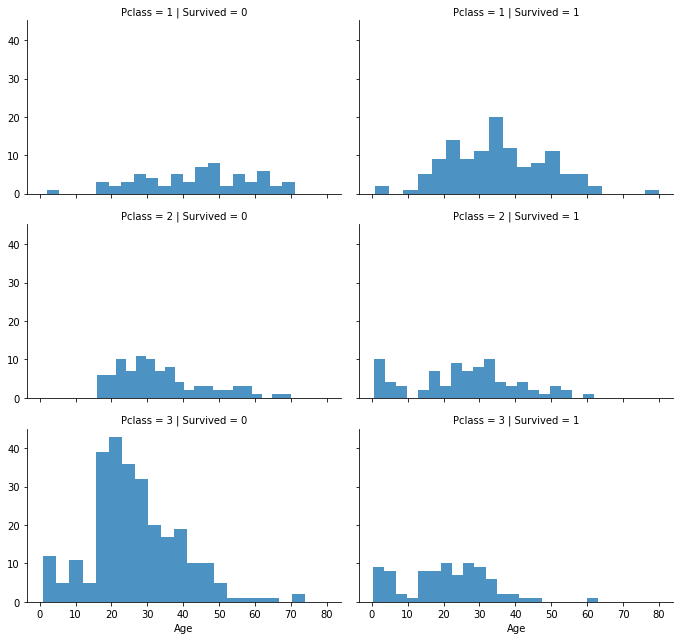

In [8]:
#Visualizing
grafik = sns.FacetGrid(train, col='Survived', row='Pclass', size = 3, aspect = 1.6)
grafik.map(plt.hist, 'Age', alpha=.8, bins=20)

**PClass 3 Aged 15 to 40 have lower chance survival**

In [9]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


**Female have higher chance of survival**

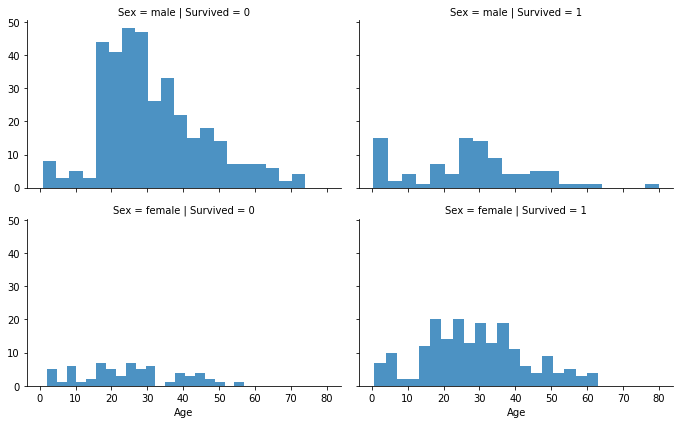

In [10]:
#Visualizing
grafik = sns.FacetGrid(train, col='Survived', row='Sex', size = 3, aspect = 1.6)
grafik.map(plt.hist, 'Age', alpha=.8, bins=20)

**Male age 15 to 45 have lower chance of survival**

**WILL NEED TO MAKE AGE BAND FOR THE MACHINE LEARNING**

In [11]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


**Family consist of 2 and 3 people have higher chance of survival (Sibling or Spouse)**

In [12]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


**Family consist of 1 to 3 people have higher chance of survival**

**MAKE NEW FAMILY COUNT COLUMN FOR MACHINE LEARNING, BECAUSE IT CORRELATES WITH SURVIVAL**

In [13]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


**People embarked in Cherbourg seems to have higher chance of survival**

In [14]:
train[['Embarked','PassengerId']].groupby(['Embarked']).count()

,PassengerId
Embarked,
C,168
Q,77
S,644


In [15]:
pd.crosstab(train['Embarked'], train['Pclass'])

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


**Because the ratio of the first class and third class from Cherbourg is almost the same, compared to Southhampton with 1/3 ratio**

**CAN MAYBE MAKE COLUMN PCLASS * EMBARKED (ALREADY DIGITIZED) FOR THE MACHINE LEARNING)**

d:\python\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
d:\python\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


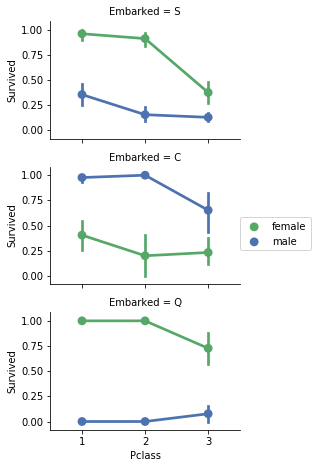

In [16]:
grafik = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grafik.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grafik.add_legend()

**Female have higher chance to survive except the one from Cherbourg**

**EXTRACT TITLE FOR NAME TO NEW COLUMN TO REPRESENT NOBILITY**

In [17]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
#CLASSIFY TITLE (RARE ONE IS COMBINED)
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [19]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


**NAME CAN BE SAFELY DROPPED NOW**

In [20]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 11), (418, 11))

**CHANGE SEX TO NUMBERICAL VALUE**

In [21]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,3
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1


**COMPLETE AGE, CABIN, AND EMBARKED COLUMN**

In [22]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [23]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess.median()
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,1,38,1,0,PC 17599,71.2833,C85,C,3
2,1,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1,1,1,35,1,0,113803,53.1000,C123,S,3
4,0,3,0,35,0,0,373450,8.0500,NaN,S,1


**CREATE AGE BANDS**

In [24]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [25]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,PC 17599,71.2833,C85,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,113803,53.1000,C123,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,373450,8.0500,NaN,S,1,"(32.0, 48.0]"


In [26]:
train = train.drop(['AgeBand'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,1,2,1,0,PC 17599,71.2833,C85,C,3
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1,1,1,2,1,0,113803,53.1000,C123,S,3
4,0,3,0,2,0,0,373450,8.0500,NaN,S,1


**CREATE FAMILY COUNT**

In [27]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


**CREATE IS ALONE COLUMN FEATURE**

In [28]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [29]:
#drop parch sibsb
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone
0,0,3,0,1,A/5 21171,7.2500,NaN,S,1,0
1,1,1,1,2,PC 17599,71.2833,C85,C,3,0
2,1,3,1,1,STON/O2. 3101282,7.9250,NaN,S,2,1
3,1,1,1,2,113803,53.1000,C123,S,3,0
4,0,3,0,2,373450,8.0500,NaN,S,1,1


**ADD RANDOM PORT TO NAN AND CONVERT TO NUMERICAL VALUE**

In [30]:
train['Embarked'].dropna()
a = ['C','S','Q']
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(ran.choice(a))

train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
Ticket      False
Fare        False
Cabin        True
Embarked    False
Title       False
IsAlone     False
dtype: bool

In [31]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone
0,0,3,0,1,A/5 21171,7.2500,NaN,1,1,0
1,1,1,1,2,PC 17599,71.2833,C85,2,3,0
2,1,3,1,1,STON/O2. 3101282,7.9250,NaN,1,2,1
3,1,1,1,2,113803,53.1000,C123,1,3,0
4,0,3,0,2,373450,8.0500,NaN,1,1,1


**IT WOULD BE INTERESTING TO INTERPOLATE CABIN NUMBER FROM TICKET AND SO FORTH, BUT NOT VERY GOOD IDEA TIME-WISE. SO I WILL JUST DROP IT**

In [32]:
train = train.drop(['Cabin','Ticket'], axis=1)
test = test.drop(['Cabin', 'Ticket'], axis = 1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,1,1,0
1,1,1,1,2,71.2833,2,3,0
2,1,3,1,1,7.9250,1,2,1
3,1,1,1,2,53.1000,1,3,0
4,0,3,0,2,8.0500,1,1,1


**CREATE FAREBAND**

In [33]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [34]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]
    
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,1,1,0
1,1,1,1,2,3,2,3,0
2,1,3,1,1,1,1,2,1
3,1,1,1,2,3,1,3,0
4,0,3,0,2,1,1,1,1
5,0,3,0,1,1,3,1,1
6,0,1,0,3,3,1,1,1
7,0,3,0,0,2,1,4,0
8,1,3,1,1,1,1,3,0
9,1,2,1,0,2,2,3,0


**MAKE AGE\*CLASS AND PCLASS\*EMBARKED**

In [35]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,3,1,1
1,893,3,1,2,0,1,3,0
2,894,2,0,3,1,3,1,1
3,895,3,0,1,1,1,1,1
4,896,3,1,1,1,1,3,0


In [36]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [37]:
for dataset in combine:
    dataset['Class*Embarked'] = dataset.Embarked * dataset.Pclass

train.loc[:, ['Class*Embarked', 'Embarked', 'Pclass']].head(10)

,Class*Embarked,Embarked,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,1,1,1
4,3,1,3
5,9,3,3
6,1,1,1
7,3,1,3
8,3,1,3
9,4,2,2


**SOLVING USING MACHINE LEARNING**

In [38]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [39]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,Class*Embarked
0,3,0,1,0,1,1,0,3,3
1,1,1,2,3,2,3,0,2,2
2,3,1,1,1,1,2,1,3,3
3,1,1,2,3,1,3,0,2,1
4,3,0,2,1,1,1,1,6,3


In [40]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class,Class*Embarked
0,3,0,2,0,3,1,1,6,9
1,3,1,2,0,1,3,0,6,3
2,2,0,3,1,3,1,1,6,6
3,3,0,1,1,1,1,1,3,3
4,3,1,1,1,1,3,0,3,3


In [44]:
#Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
#5-fold cross validation
scores = cross_val_score(decision_tree, X_train, Y_train, cv=5)
scores
#acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
#acc_decision_tree

array([0.76536313, 0.77653631, 0.80337079, 0.80337079, 0.83050847])

In [42]:
# Gaussian Naive Bayes

# Gaussian Naive Bayes

#gaussian = GaussianNB()
#gaussian.fit(X_train, Y_train)
#Y_pred = gaussian.predict(X_test)
#scores = cross_val_score(gaussian, X_train, Y_train, cv=5)
#scores

**SUBMISSION**

In [43]:
#submission = pd.DataFrame({
#        "PassengerId": test["PassengerId"],
#        "Survived": Y_pred
#    })
#submission.to_csv('submission(gaussian).csv', index=False)